# Image Segmentation: Techniques. 

## Tresholding: 

This technique aims to change each pixel to black or white depending on its comparison with some fixed value. For the picking of  this value, several tecnhiques can be used: 

* Histogram Shape
* Clustering
* Entropy
* Object Attributes
* Spacial distribution
* Local changes of a region. 

### Algorithms:

#### Otsu's: 

After calculating a histogram, an analysis of the distribution of the gray values of an image are taken into an account. The minimun between the two peaks in a bimodal histofram is chosen as threshold. Some of its drawbacks is that generally a single threshold can't give a good segmentation. 

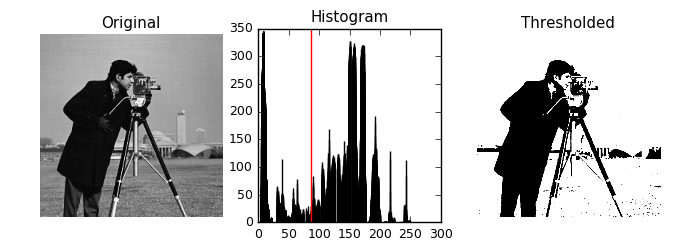

In [22]:
import matplotlib
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import threshold_otsu,threshold_li,threshold_adaptive

matplotlib.rcParams['font.size'] = 9


image = camera()
thresh = threshold_otsu(image)
threshli = threshold_li(image)
binary = image > thresh

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))
fig = plt.figure(figsize=(8, 2.5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(image)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

In [23]:
%matplotlib inline

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import camera
def plot(thresh):
    image = camera()
    binary = image > thresh
    fig = plt.figure(figsize=(8, 2.5))
    ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')

    ax2.hist(image)
    ax2.set_title('Histogram')
    ax2.axvline(thresh, color='r')

    ax3.imshow(binary, cmap=plt.cm.gray)
    ax3.set_title('Thresholded')
    ax3.axis('off')

    plt.show()


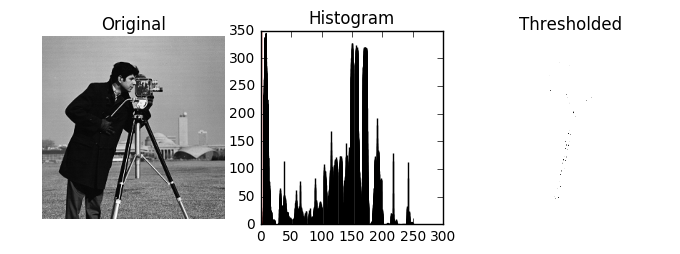

<function __main__.plot>

In [25]:
from IPython.html.widgets import interact,IntSlider



interact(plot,
               thresh=IntSlider(min=0,max=300)
               )

####  Li: 

Proposes to use a 2d histogram. 

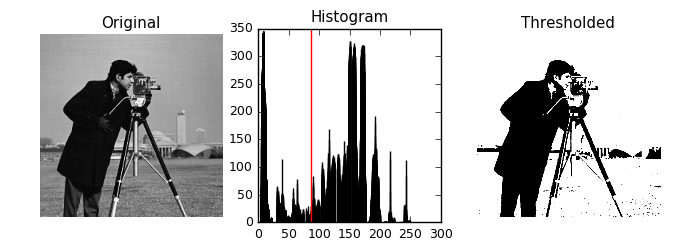

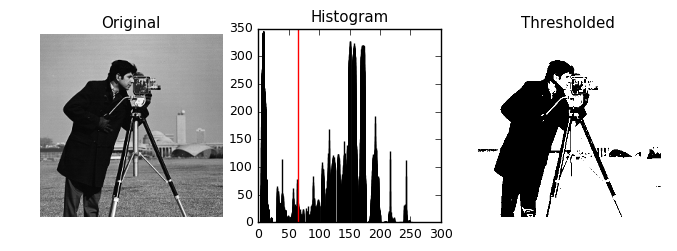

In [8]:
threshli = threshold_li(image)
plot(thresh)
plot(threshli)

### Composite Methods

*  Huang  Chau:

Ge propossed to compute first a gaussian mixture model or EM, and then look for the threshold average of means. 

* Maitra chatterje: 

BActerial foraging. 

* Rogowska : 

Proposed to divide an image into groups: 
    
    * Less 
    * Equal 
    * Mayor
Some preprocessing might be required. 

* Zhang : 

First automatic, fast, robust and accurate segmentation for bones.  Using a 3d adaptative thresholding.  Basically diferencing bone and no bone images. It uses iterative 3d correlation to validate voxel clasification. 

* Vijay: 

Used an adaptative filter, reducing the noises but adding some blur. Then implemented an adaptative wavelet thresholding was applied with multiscale product rule in the second step. 


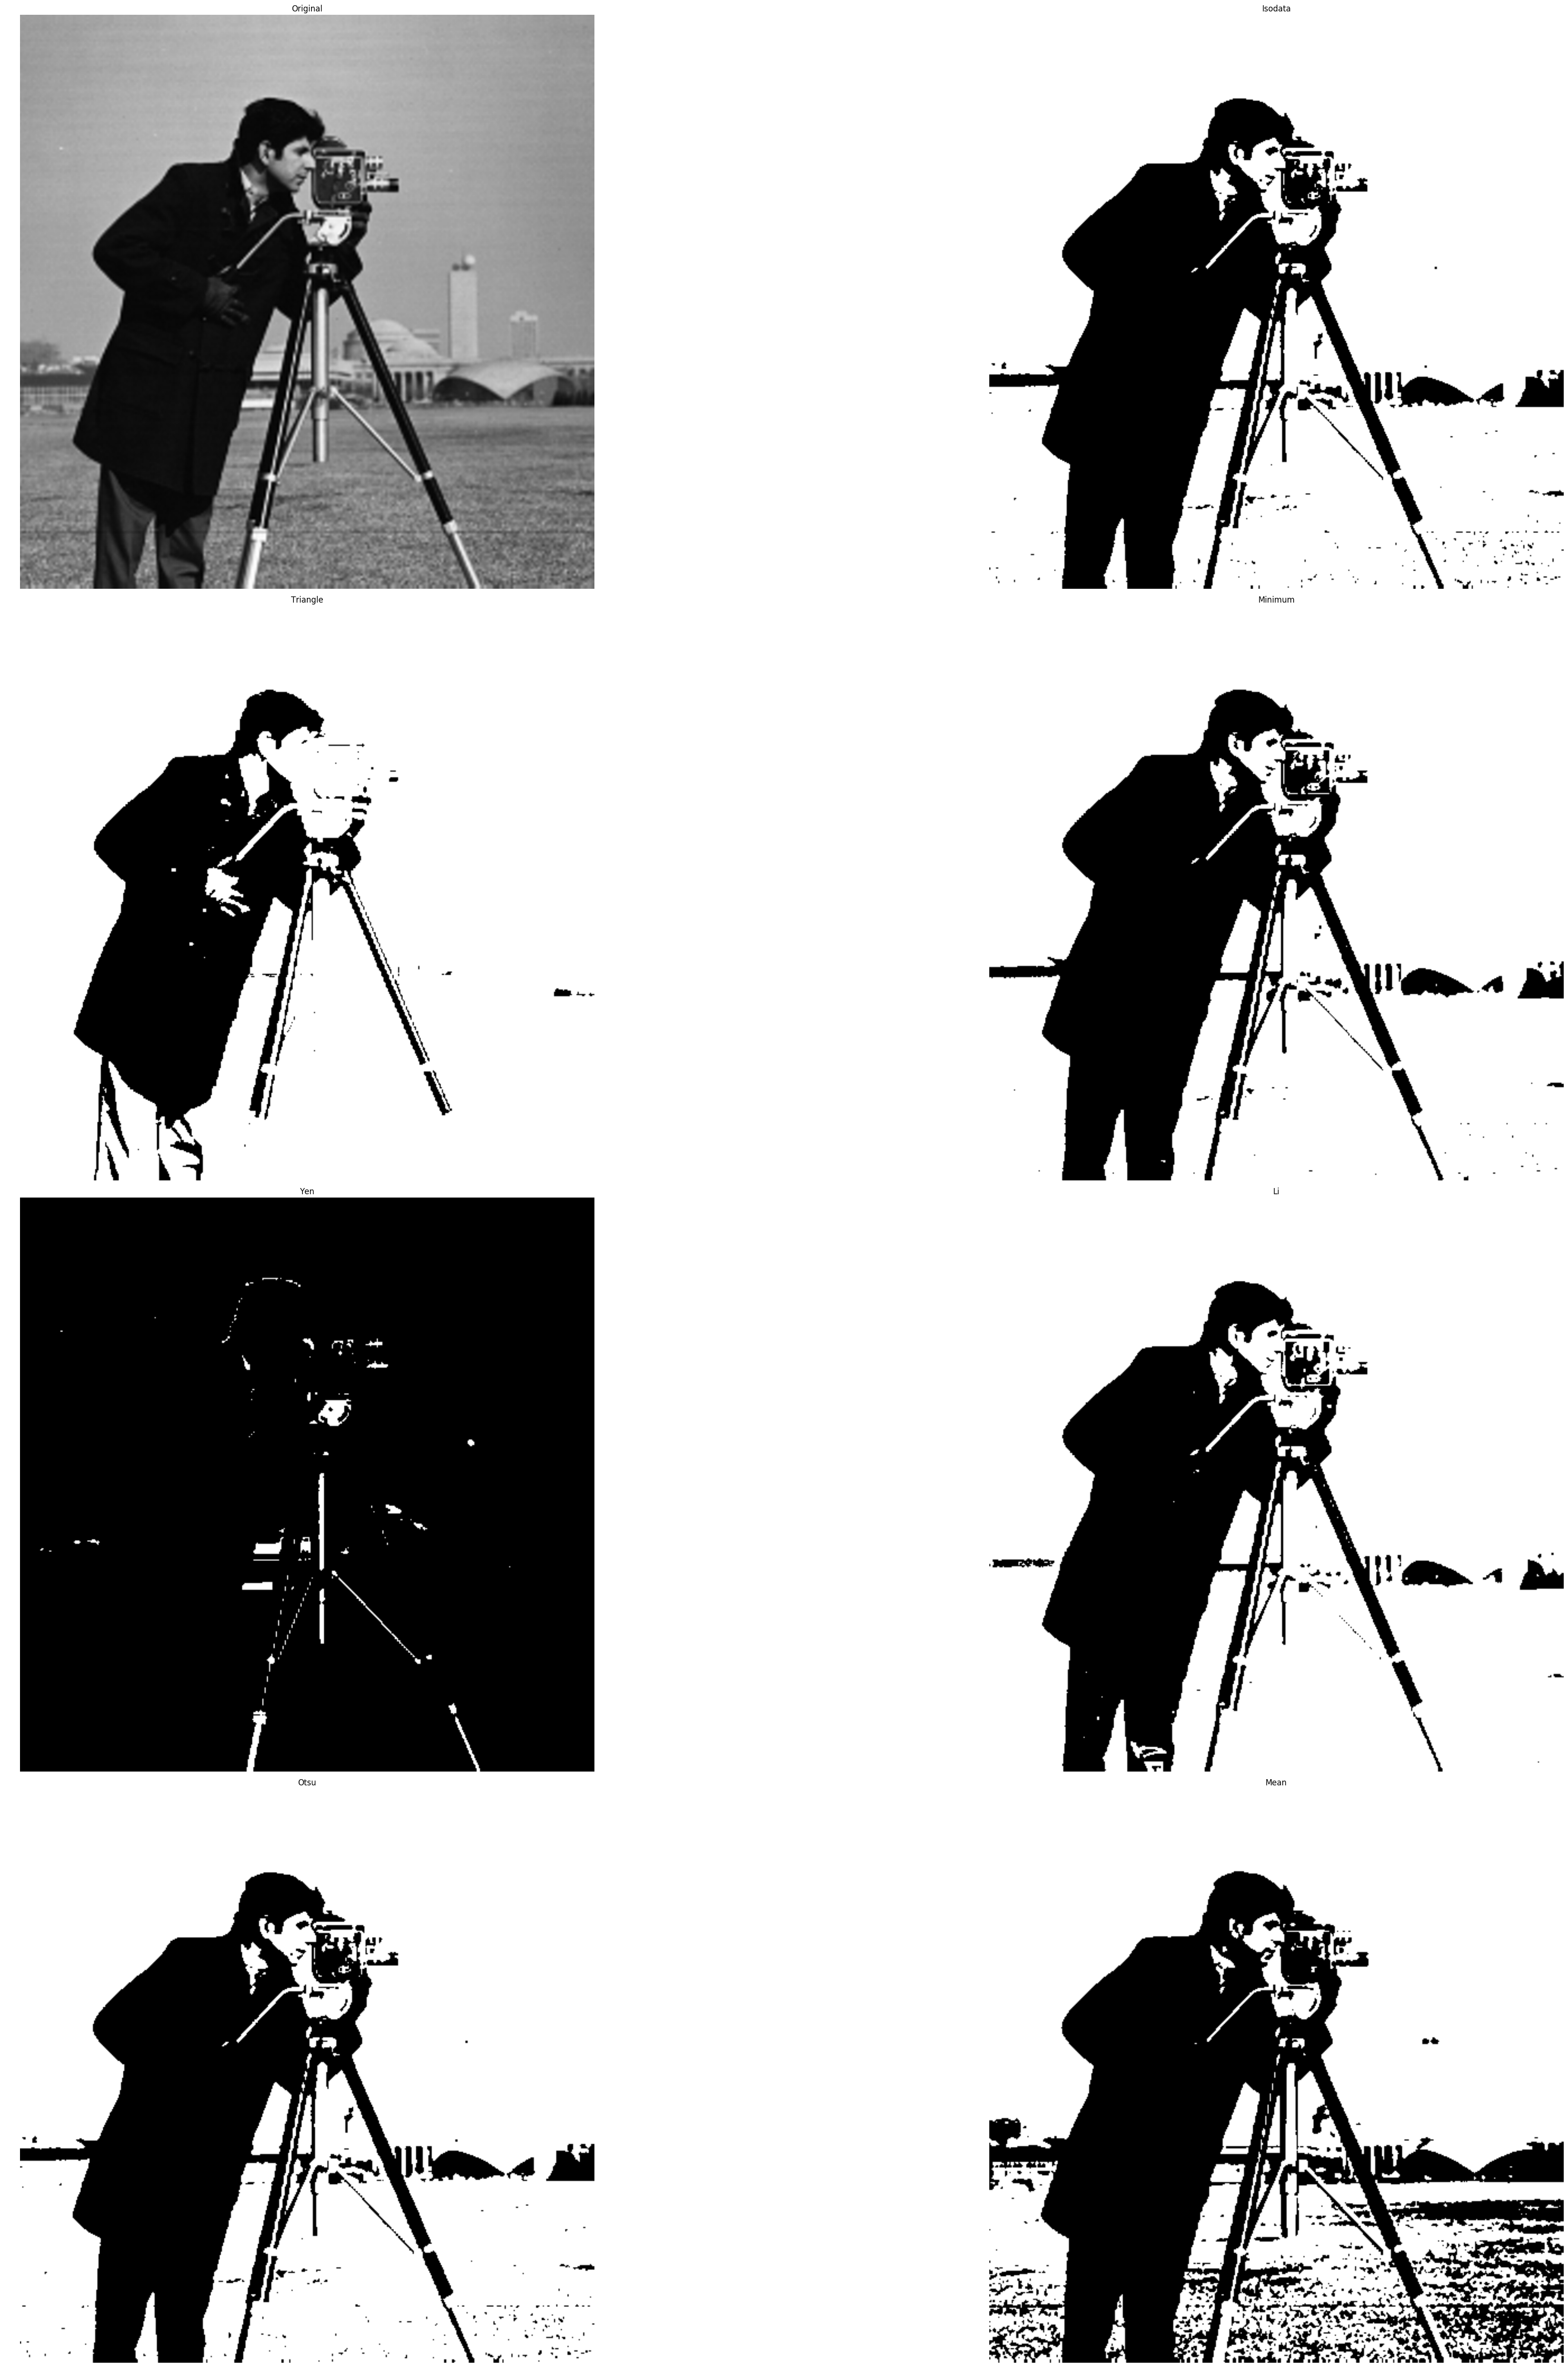

In [5]:
from skimage.data import camera
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(camera(), figsize=(50, 50), verbose=False)


## Watershed Transformation: 

The watershed is a classical algorithm used for **segmentation**, thatis, for separating different objects in an image.

Starting from user-defined markers, the watershed algorithm treats pixels values as a local topography (elevation). The algorithm floods basins from the markers, until basins attributed to different markers meet on watershed lines.  In many cases, markers are chosen as local
minima of the image, from which basins are flooded.

### Advantages: 

* Simplicity
* speed 
* complete division
* provide close contourns. 

### Drawbacks

* Oversegmentation 
* Sensitivity to Noise.
* Poor detection importatn areas with low contrats boundaries. 

## Algorithms: 

* Pengi : Multidegree Inmmersion simulation, based on Vincent and Soille. 
* Hsie h: Was aiming to small moving object detection. First, a noise removal technique is applied. 
* Frucci and Baja: Looks for homogenous regions, and there is a sucessive assignment of the regions: "Foreground" and "Background". 

* Hamarneh and Li:  Prior a shape appeareance knowledge is applied, then clustering-merging to improve in the oversegmentation. 

* Cheng: Uses this technique combined with segmentation using graph algorithms. 

* Smouvi and Masmoudi: Introduce a histogram. 

* Zanaty-AFifif Presented a seed region growing with image entropy. 

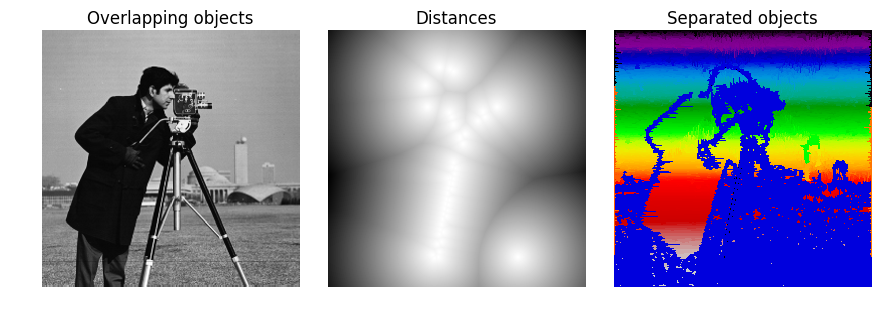

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.data import camera

# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)
image=camera()
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

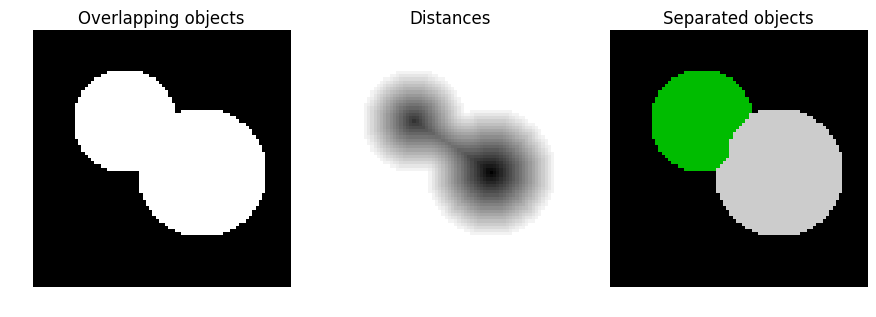

In [10]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

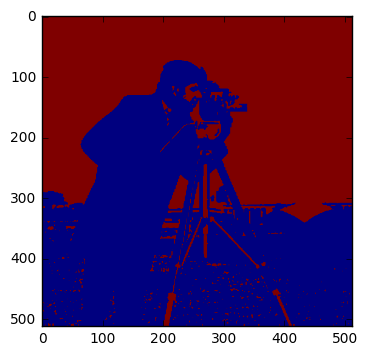

In [18]:
from skimage.segmentation import watershed
image=camera()
markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2
segme= watershed(image, markers)
plt.imshow(segme)

## Region Growing 

It comes from the MRI analysis. 

* Addams And Bischof: 

Seeded region growing. First order dependency whenever several pixels have the same difference to their neighborghs. And second order dependey one pixel has teh same difference measured to several regions. 




## Clustering: 

A cluster is a collection of object which are "similar". To define similarity we can use similatriy measure algorithms such as spatial neighbourghoods. 

### Drawbacks: 

* Time
* Complexity 
* Unwanted smoothing. 

### Algorithms : 

* Ahmed: He developed a Neighbourghood averagin additive term. And an algorithm bias corrected called BCFCM. 

* Liew and Yan: They look the spatial constraint and modeled the inhomogenity by b-spline surfaces. For checking voxel connectivity dissimilarity index are used. 

* Szilagyi: Used EMFCM algorithm to accelerate the image segmentation process. 
